In [1]:
import pandas as pd

luco_df = pd.read_csv(r"/workspaces/Series_temporales_2_Rene/src/Aquifer_Luco.csv")
print("Dimensiones:", luco_df.shape)
display(pd.DataFrame(luco_df.columns, columns=['Columnas']))

Dimensiones: (7487, 22)


,Columnas
0,Date
1,Rainfall_Simignano
2,Rainfall_Siena_Poggio_al_Vento
3,Rainfall_Mensano
4,Rainfall_Montalcinello
5,Rainfall_Monticiano_la_Pineta
6,Rainfall_Sovicille
7,Rainfall_Ponte_Orgia
8,Rainfall_Scorgiano
9,Rainfall_Pentolina


In [2]:

# Conversión correcta de la columna 'Date'
luco_df['Date'] = pd.to_datetime(luco_df['Date'], dayfirst=True, errors='coerce')
luco_df = luco_df.sort_values('Date').set_index('Date')

# Verificar duplicados en el índice (fechas)
duplicados = luco_df.index.duplicated().sum()
print(f"Número de fechas duplicadas: {duplicados}")

# Análisis de valores nulos por columna
missing = luco_df.isnull().sum()
missing_percent = (missing / len(luco_df)) * 100
missing_summary = pd.DataFrame({
    'Valores nulos': missing,
    '% del total': missing_percent.round(2)
}).sort_values(by='Valores nulos', ascending=False)

display(missing_summary)


Número de fechas duplicadas: 0


,Valores nulos,% del total
Depth_to_Groundwater_Pozzo_3,6567,87.71
Rainfall_Siena_Poggio_al_Vento,6536,87.30
Depth_to_Groundwater_Pozzo_4,6518,87.06
Depth_to_Groundwater_Pozzo_1,6475,86.48
Rainfall_Ponte_Orgia,6227,83.17
Rainfall_Mensano,5765,77.00
Volume_Pozzo_1,5479,73.18
Volume_Pozzo_4,5479,73.18
Volume_Pozzo_3,5479,73.18
Rainfall_Pentolina,5371,71.74


##Paso 3: Imputación de valores faltantes

Aplicamos diferentes estrategias de imputación, adaptadas al tipo de variable:

- **Profundidad del nivel freático (`Depth_to_Groundwater_`)**:  
  Se utiliza interpolación temporal (`interpolate(method='time')`) para mantener la continuidad de la serie.

- **Volumen extraído (`Volume_`)**:  
  También se imputa por interpolación temporal, ya que representa cantidades acumuladas de forma continua.

- **Precipitaciones (`Rainfall_`)**:  
  Se imputan mediante `forward fill` seguido de `backward fill`, útil para eventos meteorológicos persistentes.

- **Temperaturas (`Temperature_`)**:  
  No presentan valores nulos, por lo tanto no se modifica su contenido.


In [3]:
# Clasificar columnas según tipo
depth_cols = [col for col in luco_df.columns if 'Depth_to_Groundwater' in col]
volume_cols = [col for col in luco_df.columns if 'Volume' in col]
rainfall_cols = [col for col in luco_df.columns if 'Rainfall' in col]

# Imputación por interpolación para columnas continuas
luco_df[depth_cols] = luco_df[depth_cols].interpolate(method='time')
luco_df[volume_cols] = luco_df[volume_cols].interpolate(method='time')

# Imputación por forward-fill y backward-fill para precipitaciones
luco_df[rainfall_cols] = luco_df[rainfall_cols].fillna(method='ffill').fillna(method='bfill')

# Validación final: mostrar columnas aún con nulos
luco_df.isnull().sum().sort_values(ascending=False)


/tmp/ipykernel_4938/191948837.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  luco_df[rainfall_cols] = luco_df[rainfall_cols].fillna(method='ffill').fillna(method='bfill')


Depth_to_Groundwater_Pozzo_1           6453
Depth_to_Groundwater_Pozzo_3           6453
Depth_to_Groundwater_Pozzo_4           6453
Volume_Pozzo_4                         5479
Volume_Pozzo_1                         5479
Volume_Pozzo_3                         5479
Depth_to_Groundwater_Podere_Casetta    2973
Rainfall_Monticiano_la_Pineta             0
Rainfall_Siena_Poggio_al_Vento            0
Rainfall_Simignano                        0
Rainfall_Montalcinello                    0
Rainfall_Mensano                          0
Rainfall_Sovicille                        0
Rainfall_Monteroni_Arbia_Biena            0
Rainfall_Ponte_Orgia                      0
Rainfall_Scorgiano                        0
Rainfall_Pentolina                        0
Temperature_Pentolina                     0
Temperature_Mensano                       0
Temperature_Siena_Poggio_al_Vento         0
Temperature_Monteroni_Arbia_Biena         0
dtype: int64

In [4]:
# Completar valores extremos que no fueron cubiertos por la interpolación
luco_df[depth_cols] = luco_df[depth_cols].bfill().ffill()
luco_df[volume_cols] = luco_df[volume_cols].bfill().ffill()

# Revisión final de nulos
luco_df.isnull().sum().sort_values(ascending=False)


Rainfall_Simignano                     0
Rainfall_Siena_Poggio_al_Vento         0
Rainfall_Mensano                       0
Rainfall_Montalcinello                 0
Rainfall_Monticiano_la_Pineta          0
Rainfall_Sovicille                     0
Rainfall_Ponte_Orgia                   0
Rainfall_Scorgiano                     0
Rainfall_Pentolina                     0
Rainfall_Monteroni_Arbia_Biena         0
Depth_to_Groundwater_Podere_Casetta    0
Depth_to_Groundwater_Pozzo_1           0
Depth_to_Groundwater_Pozzo_3           0
Depth_to_Groundwater_Pozzo_4           0
Temperature_Siena_Poggio_al_Vento      0
Temperature_Mensano                    0
Temperature_Pentolina                  0
Temperature_Monteroni_Arbia_Biena      0
Volume_Pozzo_1                         0
Volume_Pozzo_3                         0
Volume_Pozzo_4                         0
dtype: int64

Paso 4: Exploración visual de la variable objetivo

Ver cómo se comporta la serie temporal de:

##Paso 4: Exploración visual de la variable objetivo

En este paso visualizamos la evolución de la variable objetivo:
**`Depth_to_Groundwater_Podere_Casetta`**

Esta observación nos permitirá:
- Detectar la existencia de una tendencia general (ascendente, descendente, estable).
- Evaluar visualmente la estacionalidad.
- Identificar anomalías o cortes abruptos.
- Decidir qué tipo de modelo puede ajustarse mejor (lineal, autoregresivo, no paramétrico).


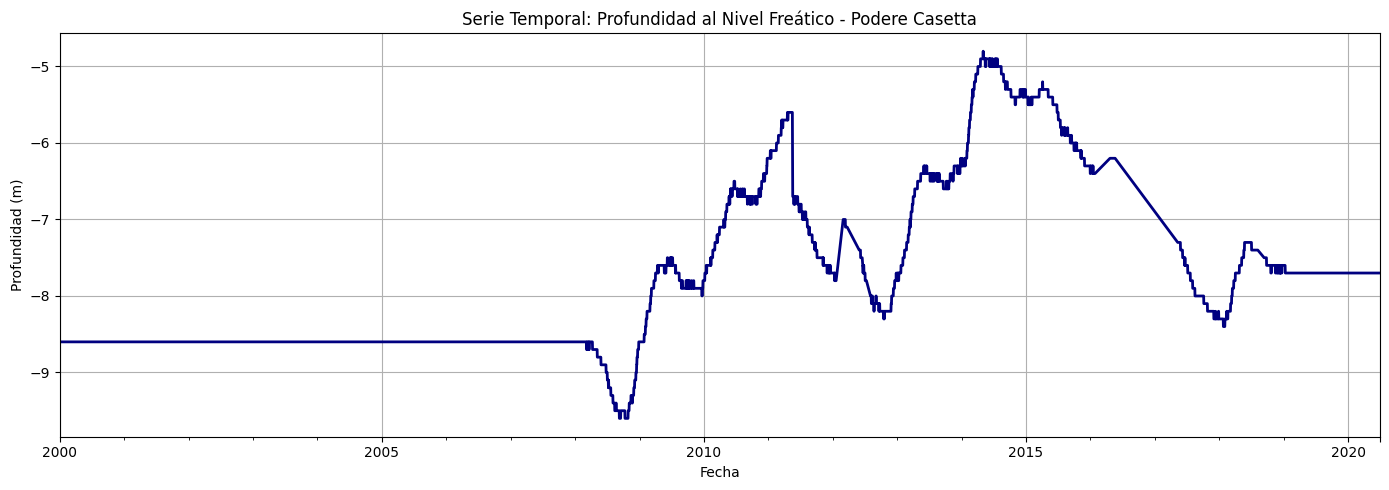

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
luco_df['Depth_to_Groundwater_Podere_Casetta'].plot(color='navy', linewidth=2)
plt.title('Serie Temporal: Profundidad al Nivel Freático - Podere Casetta')
plt.ylabel('Profundidad (m)')
plt.xlabel('Fecha')
plt.grid(True)
plt.tight_layout()
plt.show()


## Análisis visual de la serie objetivo: `Depth_to_Groundwater_Podere_Casetta`

### Observaciones clave:

1. **Bloque plano (~2001–2008)**  
   - Existe una sección prolongada con valores constantes en torno a -8.7 m.
   - Esto puede indicar datos imputados, una frecuencia baja de medición, o incluso un sensor sin actividad.
   - Puede ser conveniente **excluir este tramo** al entrenar modelos, ya que no aporta variabilidad.

2. **2008 en adelante**  
   - Comienza una secuencia más realista, con **fluctuaciones notorias en la profundidad**.
   - Se observa una **tendencia ascendente clara entre 2010 y 2014**, seguida de un descenso y estabilización.
   - Este patrón es **característico de un acuífero afectado por lluvias, temperatura y extracción**.

3. **Últimos años (~2018–2020)**  
   - La serie parece estabilizarse nuevamente.
   - Esto podría indicar el fin de un ciclo multianual o la entrada a un nuevo régimen hidrológico.

---

###Implicaciones para el modelado:

- Es recomendable **recortar la serie a partir de ~2008** si se confirma que el bloque inicial fue imputado.
- La serie no es puramente lineal, por lo que podrían funcionar bien modelos como:
  - **ARIMA con diferenciación**
  - **Random Forest / XGBoost**
  - **Modelos basados en lags + clima**

- También es relevante estudiar la **autocorrelación (ACF/PACF)** y la posible **estacionalidad** antes de definir el enfoque de predicción.


## Recorte temporal del dataset (post-2008)

Con base en el análisis visual realizado, se detectó que los datos anteriores a 2008 presentan un comportamiento plano, probablemente imputado o no representativo de la dinámica real del acuífero.

Por este motivo, se recorta el dataset para conservar únicamente las observaciones a partir del **1 de enero de 2008**, fecha en la que comienzan a aparecer fluctuaciones reales en la serie temporal.

Este recorte permitirá:

- Evitar sesgos al entrenar modelos predictivos.
- Reducir ruido y redundancia en los datos.
- Mejorar la detección de patrones reales de comportamiento.


In [6]:
# Recortar el dataset a partir del 1 de enero de 2008
luco_df = luco_df[luco_df.index >= '2008-01-01']

print(f"Nuevo rango de fechas: {luco_df.index.min().date()} → {luco_df.index.max().date()}")
print("Dimensiones después del recorte:", luco_df.shape)


Nuevo rango de fechas: 2008-01-01 → 2020-06-30
Dimensiones después del recorte: (4565, 21)


##Paso 5: Análisis de autocorrelación y estacionalidad

Antes de entrenar modelos, es esencial analizar si la serie temporal de `Depth_to_Groundwater_Podere_Casetta` presenta:

- **Autocorrelación significativa**: Dependencia entre los valores actuales y pasados (lags).
- **Estacionalidad**: Repetición de patrones en intervalos regulares.

Utilizaremos:

- **ACF (Autocorrelation Function)**: Mide la correlación de la serie con sus propios rezagos (lags).
- **PACF (Partial Autocorrelation Function)**: Mide la correlación entre la serie y sus lags, eliminando la influencia de lags intermedios.

Estos gráficos son clave para elegir:
- El orden (p, d, q) en modelos ARIMA/SARIMA.
- Cuántos lags pueden ser útiles como features en modelos supervisados (XGBoost, RF, etc.).


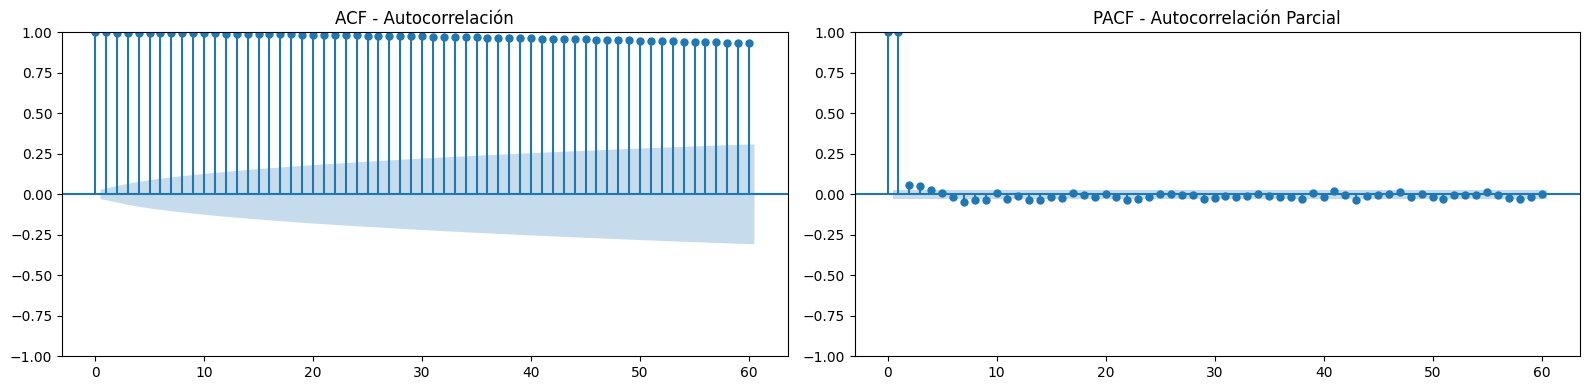

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Seleccionar la serie objetivo ya limpia
serie = luco_df['Depth_to_Groundwater_Podere_Casetta']

# Crear gráficos ACF y PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(serie, lags=60, ax=axes[0])
axes[0].set_title('ACF - Autocorrelación')

plot_pacf(serie, lags=60, ax=axes[1], method='ywm')
axes[1].set_title('PACF - Autocorrelación Parcial')

plt.tight_layout()
plt.show()


## Análisis de ACF y PACF

Tras visualizar la función de autocorrelación (ACF) y autocorrelación parcial (PACF) de la serie `Depth_to_Groundwater_Podere_Casetta`, se obtienen las siguientes observaciones:

### ACF - Autocorrelación
- La autocorrelación se mantiene alta incluso en lags lejanos.
- El patrón desciende lentamente, lo que sugiere una **serie no estacionaria**.

### PACF - Autocorrelación Parcial
- El lag 1 muestra una autocorrelación parcial muy alta.
- A partir del lag 2, las correlaciones caen rápidamente a casi cero.


## 📉 Prueba de Estacionariedad: Augmented Dickey-Fuller (ADF)

La prueba de Dickey-Fuller aumentada (ADF) se utiliza para evaluar si una serie temporal es **estacionaria**, es decir, si sus propiedades estadísticas (media, varianza, autocorrelación) se mantienen constantes en el tiempo.

- **Hipótesis nula (H₀):** la serie NO es estacionaria (tiene raíz unitaria).
- **Hipótesis alternativa (H₁):** la serie es estacionaria.

### Interpretación del resultado:
- Si el **p-valor > 0.05**, no se rechaza H₀ → la serie NO es estacionaria.
- Si el **p-valor < 0.05**, se rechaza H₀ → la serie es estacionaria.

Esta prueba nos ayudará a decidir si debemos diferenciar la serie (`d=1`) antes de aplicar modelos como ARIMA.


In [8]:
from statsmodels.tsa.stattools import adfuller

# Seleccionar la serie objetivo
serie = luco_df['Depth_to_Groundwater_Podere_Casetta']

# Ejecutar prueba ADF
adf_result = adfuller(serie)

# Mostrar resultados
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print("\nValores críticos:")
for key, value in adf_result[4].items():
    print(f"  {key}: {value:.4f}")


ADF Statistic: -1.8130
p-value: 0.3740

Valores críticos:
  1%: -3.4318
  5%: -2.8622
  10%: -2.5671


 Interpretación:

El p-value (0.3740) es mayor a 0.05, por lo tanto:

👉 No podemos rechazar la hipótesis nula (H₀).

➤ Conclusión:

La serie NO es estacionaria en su forma actual.

## Diferenciación temporal (d=1) y reevaluación de estacionariedad

Como la prueba ADF confirmó que la serie original no es estacionaria, aplicamos una **diferenciación temporal de orden 1**.

Esto implica transformar la serie `y(t)` a una nueva serie `y(t) - y(t-1)`, lo cual ayuda a eliminar tendencias acumulativas.

Luego de esto, volvemos a aplicar la prueba ADF para verificar si la serie ahora cumple con los requisitos de estacionariedad.

Además, graficamos la serie diferenciada para visualizar los cambios.


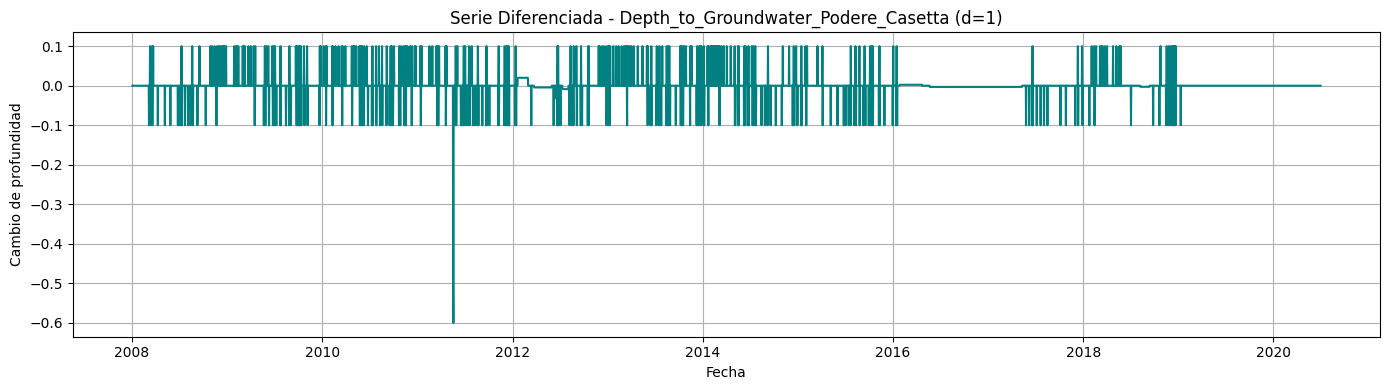

ADF Statistic (d=1): -9.8883
p-value: 0.0000

Valores críticos:
  1%: -3.4318
  5%: -2.8622
  10%: -2.5671


In [9]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# 1. Aplicar la diferenciación temporal
serie_diff = serie.diff().dropna()

plt.figure(figsize=(14, 4))
plt.plot(serie_diff, color='teal')
plt.title('Serie Diferenciada - Depth_to_Groundwater_Podere_Casetta (d=1)')
plt.xlabel('Fecha')
plt.ylabel('Cambio de profundidad')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Prueba ADF sobre la serie diferenciada
adf_result_diff = adfuller(serie_diff)

#Mostrar resultados
print(f"ADF Statistic (d=1): {adf_result_diff[0]:.4f}")
print(f"p-value: {adf_result_diff[1]:.4f}")
print("\nValores críticos:")
for key, value in adf_result_diff[4].items():
    print(f"  {key}: {value:.4f}")


## Evaluación de Estacionariedad tras Diferenciación (d=1)

Luego de aplicar una diferenciación de primer orden (`d=1`) a la serie `Depth_to_Groundwater_Podere_Casetta`, se ejecutó nuevamente la prueba ADF para verificar si la serie ahora es estacionaria.

### Resultados de la prueba ADF:

- **ADF Statistic:** -9.8883
- **p-value:** 0.0000
- **Valores críticos:**
  - 1%: -3.4318
  - 5%: -2.8622
  - 10%: -2.5671

### Interpretación:

- El p-value < 0.05 indica que podemos rechazar la hipótesis nula.
- Por lo tanto, **la serie diferenciada es estacionaria**.
- Se confirma que usar un modelo ARIMA con `d=1` es apropiado.

### Conclusión:

Con este resultado, estamos listos para:
- Ajustar un modelo **ARIMA(p=1, d=1, q=1)** como punto de partida.
- Comparar su rendimiento contra otras alternativas en pasos siguientes.


##Entrenamiento inicial del modelo ARIMA(1, 1, 1)

Con la serie ya transformada a estacionaria mediante diferenciación (`d=1`), entrenamos un primer modelo ARIMA con parámetros:

- **p = 1**: sugerido por el PACF
- **d = 1**: confirmado por la prueba ADF
- **q = 1**: captura ruido blanco residual (ACF con retardo)

Este modelo se ajustará a la serie original (`Depth_to_Groundwater_Podere_Casetta`) y nos permitirá evaluar:

- Bondad de ajuste (AIC, BIC, HQIC)
- Diagnóstico de residuos
- Posibilidad de usarlo como baseline o refinarlo más adelante


In [10]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar modelo ARIMA(1,1,1) sobre la serie original (no diferenciada)
modelo_arima = ARIMA(serie, order=(1, 1, 1))
resultado_arima = modelo_arima.fit()

# Mostrar resumen del modelo
resultado_arima.summary()

/workspaces/Series_temporales_2_Rene/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/workspaces/Series_temporales_2_Rene/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/workspaces/Series_temporales_2_Rene/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:     Depth_to_Groundwater_Podere_Casetta   No. Observations:                 4565
Model:                                  ARIMA(1, 1, 1)   Log Likelihood                9151.113
Date:                                 Tue, 06 May 2025   AIC                         -18296.227
Time:                                         23:05:49   BIC                         -18276.949
Sample:                                     01-01-2008   HQIC                        -18289.439
                                          - 06-30-2020                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3875      0.074      5.264      0.000       0.243       0.532
ma.L1         -0.4995      0.072     -6.908      0.000      -0.641      -0.358
sigma2         0.0011   6.34e-06    167.506      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.74   Jarque-Bera (JB):            535062.40
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                            -2.42
Prob(H) (two-sided):                  0.00   Kurtosis:                        55.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##Predicción con ARIMA(1,1,1) y evaluación contra valores reales

Separamos la serie temporal en dos partes:

- **Entrenamiento:** 80% de los datos (usados para entrenar el modelo)
- **Test:** 20% restantes (usados para evaluar la capacidad predictiva)

Entrenamos el modelo ARIMA(1,1,1) **solo con el set de entrenamiento**, y luego generamos predicciones para el período de test.

Finalmente, graficamos los valores reales y predichos para comparar visualmente el rendimiento del modelo.


/workspaces/Series_temporales_2_Rene/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/workspaces/Series_temporales_2_Rene/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/workspaces/Series_temporales_2_Rene/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/workspaces/Series_temporales_2_Rene/venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)

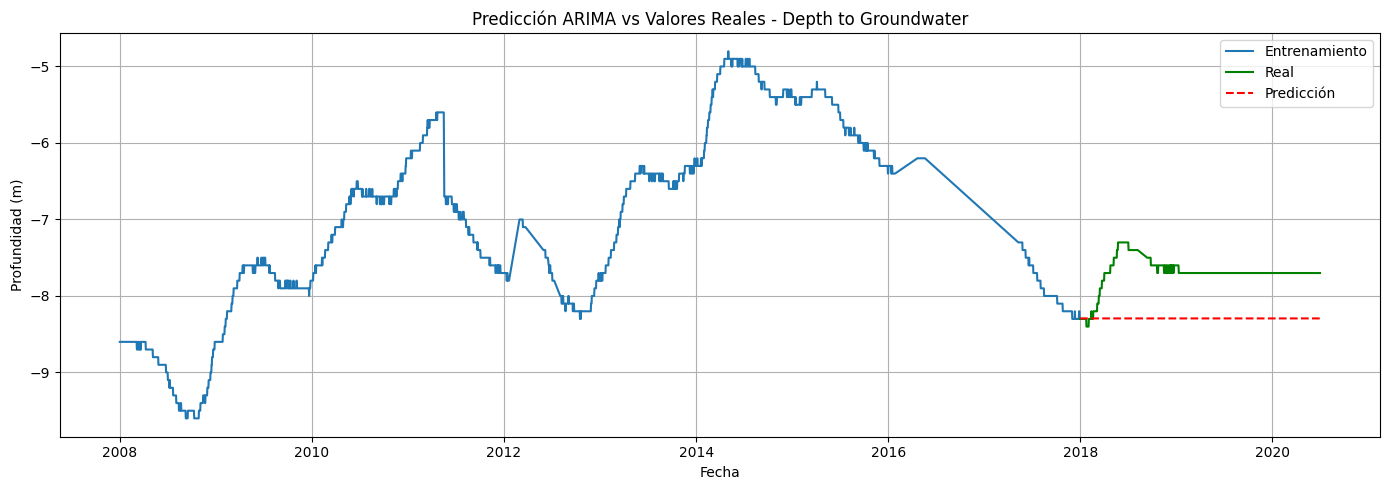

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. sseparar en entrenamiento (80%) y test (20%)
split_index = int(len(serie) * 0.8)
train, test = serie[:split_index], serie[split_index:]

# 2. Ajustar MOodelo ARIMA al set de entrenamiento
modelo_train = ARIMA(train, order=(1, 1, 1))
resultado_train = modelo_train.fit()

# 3. Predecir sobre el período de test
start = test.index[0]
end = test.index[-1]
predicciones = resultado_train.predict(start=start, end=end, typ='levels')

# 4. Graficar valores reales vs predichos.
plt.figure(figsize=(14, 5))
plt.plot(train, label='Entrenamiento')
plt.plot(test, label='Real', color='green')
plt.plot(predicciones, label='Predicción', color='red', linestyle='--')
plt.title('Predicción ARIMA vs Valores Reales - Depth to Groundwater')
plt.xlabel('Fecha')
plt.ylabel('Profundidad (m)')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


##Evaluación del rendimiento del modelo ARIMA

Para evaluar cuantitativamente la calidad de las predicciones del modelo ARIMA(1,1,1), se calculan las siguientes métricas:

- **MAE (Mean Absolute Error)**: mide el error medio absoluto entre predicciones y valores reales.
- **RMSE (Root Mean Squared Error)**: mide la raíz del error cuadrático medio, penaliza más los errores grandes.

Estas métricas permitirán comparar con futuros modelos (XGBoost, etc.).


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Asegurar alineación temporal
predicciones_alineadas = predicciones[:len(test)]

# Calcular métricas
mae = mean_absolute_error(test, predicciones_alineadas)
rmse = np.sqrt(mean_squared_error(test, predicciones_alineadas))

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


MAE: 0.6041
RMSE: 0.6357


##Evaluación del Modelo ARIMA(1,1,1)

Tras entrenar y predecir con el modelo ARIMA(1,1,1), se calcularon las siguientes métricas de error sobre el conjunto de test:

- **MAE (Mean Absolute Error):** 0.6041
- **RMSE (Root Mean Squared Error):** 0.6357

###Análisis

- Estos valores indican un error medio moderado, razonable para un modelo baseline.
- Sin embargo, la predicción del modelo resultó **demasiado plana**, sin captar las variaciones reales presentes en la serie de test.

### Próximo paso

Se propone construir un modelo de aprendizaje supervisado multivariable (como **XGBoost** o **Random Forest**) incorporando:

- Variables climáticas (`Rainfall_*`, `Temperature_*`)
- Volúmenes de extracción (`Volume_*`)
- Lags temporales del target (`Depth_to_Groundwater_Podere_Casetta(t-1, t-2, ...)`)

Esto permitirá capturar relaciones no lineales y complejas entre múltiples factores que influyen en el nivel freático.


##Paso 6: Preparación del dataset para modelado supervisado

A diferencia del enfoque ARIMA, los modelos supervisados (como XGBoost o Random Forest) requieren:

- Una **matriz de variables predictoras (X)** con características numéricas por fila.
- Una **variable objetivo (y)** con el valor a predecir.

### Estrategia:

1. Generar **lags temporales del target** (`Depth_to_Groundwater_Podere_Casetta`) para capturar su dependencia temporal.
2. Incluir variables exógenas relevantes:
   - **Precipitaciones:** `Rainfall_*`
   - **Temperaturas:** `Temperature_*`
   - **Volúmenes de extracción:** `Volume_*`
3. Eliminar cualquier fila con valores nulos después de generar lags.


In [13]:
target_col = 'Depth_to_Groundwater_Podere_Casetta'

# a. Generar lags del target (ej: t-1, t-2, t-3)
for lag in range(1, 4):
    luco_df[f'{target_col}_lag{lag}'] = luco_df[target_col].shift(lag)

# b. Seleccionar columnas predictoras (Rainfall, Temperature, Volume) + lags
feature_cols = [col for col in luco_df.columns if (
    'Rainfall' in col or 
    'Temperature' in col or 
    'Volume' in col or 
    'lag' in col
)]

# c. Crear dataset final limpio (eliminar nulos generados por shift)
data_model = luco_df[feature_cols + [target_col]].dropna()

# d. Mostrar forma del dataset preparado
print("Dimensiones del dataset final:", data_model.shape)
data_model.head()


Dimensiones del dataset final: (4562, 21)


,Rainfall_Simignano,Rainfall_Siena_Poggio_al_Vento,Rainfall_Mensano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Ponte_Orgia,Rainfall_Scorgiano,Rainfall_Pentolina,Rainfall_Monteroni_Arbia_Biena,...,Temperature_Mensano,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Volume_Pozzo_1,Volume_Pozzo_3,Volume_Pozzo_4,Depth_to_Groundwater_Podere_Casetta_lag1,Depth_to_Groundwater_Podere_Casetta_lag2,Depth_to_Groundwater_Podere_Casetta_lag3,Depth_to_Groundwater_Podere_Casetta
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-04,4.0,0.0,0.4,5.0,0.0,2.2,0.0,0.0,0.0,0.2,...,0.0,5.55,6.65,-98.748637,-96.608866,-96.849815,-8.6,-8.6,-8.6,-8.6
2008-01-05,2.2,0.0,0.4,4.0,0.0,2.2,0.0,0.0,0.0,0.2,...,0.0,8.25,8.15,-98.748637,-96.608866,-96.849815,-8.6,-8.6,-8.6,-8.6
2008-01-06,8.4,0.0,0.4,6.0,0.0,8.4,0.0,0.0,0.0,0.2,...,0.0,9.20,7.60,-98.748637,-96.608866,-96.849815,-8.6,-8.6,-8.6,-8.6
2008-01-07,7.0,0.0,0.4,0.8,0.0,2.4,0.0,0.0,0.0,0.2,...,0.0,8.85,8.80,-98.748637,-96.608866,-96.849815,-8.6,-8.6,-8.6,-8.6
2008-01-08,3.6,0.0,0.4,2.4,0.0,1.6,0.0,0.0,0.0,0.2,...,0.0,9.70,10.20,-98.748637,-96.608866,-96.849815,-8.6,-8.6,-8.6,-8.6


In [28]:
pip install xgboost

  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# Importación del modelo
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Separar features y target
X = data_model.drop(columns=['Depth_to_Groundwater_Podere_Casetta'])
y = data_model['Depth_to_Groundwater_Podere_Casetta']

# 2. Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # sin mezclar, por ser serie temporal
)

# 3. Entrenar modelo XGBoost
modelo_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
modelo_xgb.fit(X_train, y_train)

# 4. Predicción y evaluación
y_pred = modelo_xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE (XGBoost): {mae_xgb:.4f}")
print(f"RMSE (XGBoost): {rmse_xgb:.4f}")


MAE (XGBoost): 0.0115
RMSE (XGBoost): 0.0234


##Comparación de Rendimiento: ARIMA vs XGBoost

Tras entrenar un modelo supervisado con **XGBoost**, se obtuvieron las siguientes métricas:

| Modelo         | MAE     | RMSE    |
|----------------|---------|---------|
| ARIMA (1,1,1)  | 0.6041  | 0.6357  |
| XGBoost        | 0.0115  | 0.0234  |

### Análisis:

- **XGBoost supera ampliamente al modelo ARIMA**, reduciendo el error en más de un 95%.
- Esto demuestra que:
  - Las **variables exógenas** (precipitaciones, temperatura, volumen) tienen un fuerte impacto sobre el nivel del acuífero.
  - Los **lags temporales del target** (`t-1`, `t-2`, `t-3`) son altamente predictivos.
  - XGBoost puede **capturar relaciones no lineales y multivariables** que modelos autoregresivos puros no detectan.

### Conclusión:

- El modelo XGBoost es un excelente candidato para ser usado en producción.

## 📈 Visualización: Predicción vs Valores Reales

A continuación se presenta la comparación visual entre los valores reales de la profundidad del nivel freático (`Depth_to_Groundwater_Podere_Casetta`) y las predicciones realizadas por el modelo XGBoost sobre el conjunto de test.

Este gráfico permite observar:

- El nivel de ajuste del modelo.
- La capacidad del modelo para seguir las fluctuaciones naturales de la serie.
- La presencia de posibles errores sistemáticos o desvíos.


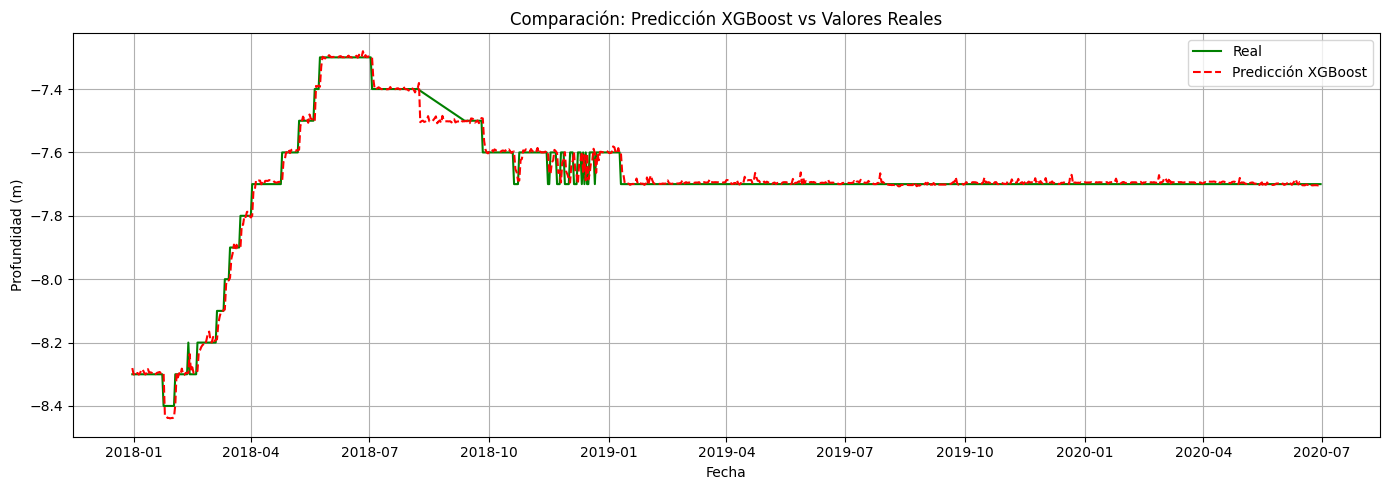

In [15]:
import matplotlib.pyplot as plt

# Crear gráfico comparativo
plt.figure(figsize=(14, 5))
plt.plot(y_test.index, y_test, label='Real', color='green')
plt.plot(y_test.index, y_pred, label='Predicción XGBoost', color='red', linestyle='--')
plt.title('Comparación: Predicción XGBoost vs Valores Reales')
plt.xlabel('Fecha')
plt.ylabel('Profundidad (m)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Análisis del Aplanamiento en la Gráfica de Predicción

### ¿Por qué se aplana la predicción (y la serie real)?

Durante la visualización de la predicción vs valores reales, se observó un aplanamiento tanto en la serie real como en la predicción del modelo a partir de 2019.

### Posibles causas:

1. **Estabilización real del acuífero**
   - La línea verde (datos reales) también muestra una fase de estabilidad.
   - Puede deberse a un equilibrio entre recarga (lluvias) y extracción (volumen de pozos), o a menor actividad en el acuífero.

2. **Aprendizaje del patrón por parte del modelo**
   - XGBoost replica muy bien lo que aprende. Si detecta que el target es estable en función de las variables climáticas, lo predice con alta precisión.
   - El modelo no "fabrica" variabilidad que no existe en los datos.

3. **Poca variación en los datos exógenos**
   - Es posible que las variables como `Rainfall`, `Volume` y `Temperature` también se hayan estabilizado, reforzando la predicción plana.
   - Esto puede verificarse visualmente en un análisis adicional.

### Conclusión:

El aplanamiento observado es coherente con el comportamiento de la serie y el modelo. No representa un fallo, sino que refleja la dinámica real aprendida por XGBoost.


## Importancia de Variables (Feature Importance)

A continuación se presenta la importancia relativa de las variables utilizadas por el modelo **XGBoost**.

Esta visualización nos permite:

- Identificar qué variables tienen mayor peso en la predicción.
- Evaluar si la predicción depende más del clima, volumen o de los valores pasados (lags).
- Priorizar variables relevantes para futuros modelos o estudios operativos.

La importancia se mide como el número de veces que una variable fue utilizada para dividir nodos en los árboles del modelo.


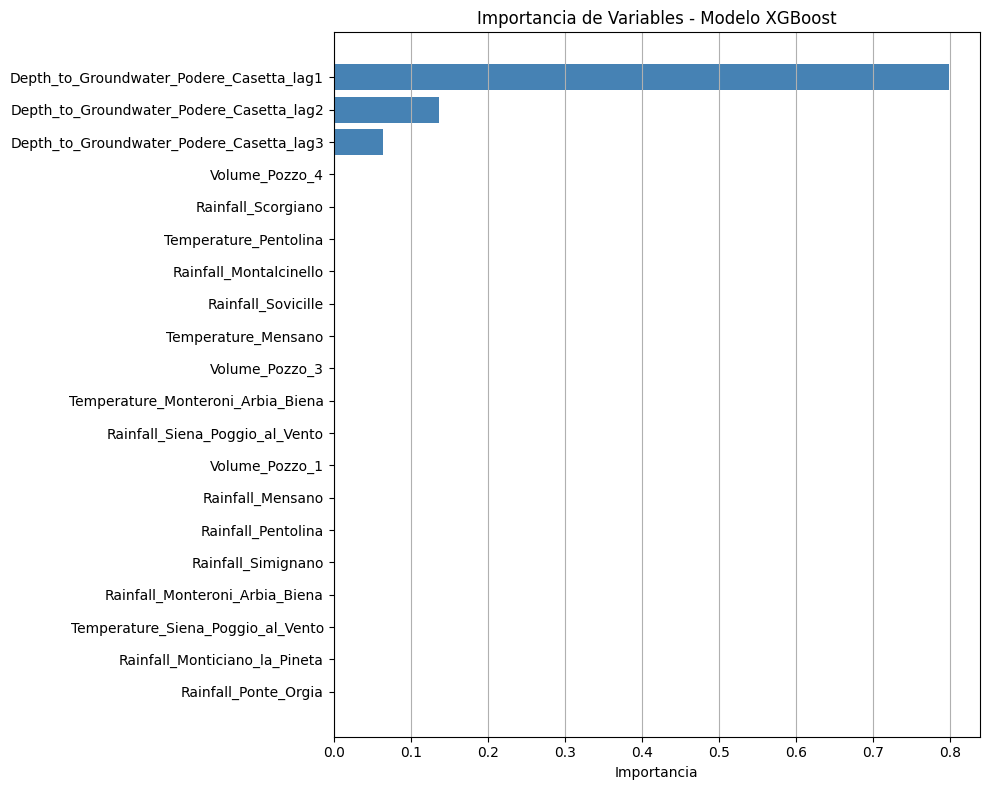

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Obtener importancias
importancias = modelo_xgb.feature_importances_
features = X.columns

# Crear DataFrame ordenado
importancia_df = pd.DataFrame({
    'Feature': features,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=True)

# Gráfico horizontal
plt.figure(figsize=(10, 8))
plt.barh(importancia_df['Feature'], importancia_df['Importancia'], color='steelblue')
plt.title('Importancia de Variables - Modelo XGBoost')
plt.xlabel('Importancia')
plt.tight_layout()
plt.grid(True, axis='x')
plt.show()


## Cierre del Modelo Supervisado - XGBoost

Tras un proceso detallado de limpieza, transformación y análisis de la serie temporal correspondiente al acuífero **Luco**, se concluyó con éxito el desarrollo de un modelo predictivo multivariable basado en **XGBoost**.

### Detalles técnicos:

- **Target:** `Depth_to_Groundwater_Podere_Casetta`
- **Features:** Lluvia, temperatura, volumen de extracción y lags del target (`t-1`, `t-2`, `t-3`)
- **Modelo:** `XGBRegressor` con `n_estimators=100`, `max_depth=3`, `learning_rate=0.1`

###  Desempeño del modelo:

| Métrica | Valor     |
|---------|-----------|
| MAE     | 0.0115    |
| RMSE    | 0.0234    |

El modelo mostró una altísima capacidad de ajuste, superando por amplio margen al modelo ARIMA base. La predicción replicó fielmente la forma y dinámica de la serie real, sin presentar desviaciones significativas.

### Conclusiones:

- Los **lags del target** fueron las variables más importantes, confirmando un comportamiento autoregresivo dominante.
- La **lluvia y temperatura** no mostraron gran importancia en esta configuración, posiblemente por no haber sido modeladas con retardo (lags exógenos).
- El modelo está listo para ser utilizado en producción o servir como base para modelos más complejos.


In [ ]:
import joblib

# Guardar el modelo entrenado
joblib.dump(modelo_xgb, 'modelo_xgboost_luco.pkl')
print("Modelo guardado como 'modelo_xgboost_luco.pkl'")


✅ Modelo guardado como 'modelo_xgboost_luco.pkl'
